<a href="https://colab.research.google.com/github/VishalSinhaRoy/Fraud_Detection-Online_Transaction-ML/blob/main/Fraud_Detection_Online_Transaction_ML(Assgn_M6)(Vishal's).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Fraud Detection-Online Transaction-ML



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

Online payment has become the most prevalent method of conducting transactions globally, driven by the convenience and speed it offers. As people increasingly turn to digital methods for their financial transactions—whether for shopping, bill payments, or money transfers—the volume of online payments has surged. However, this growth in online payment activity has also led to a corresponding increase in payment fraud, posing significant challenges to consumers, businesses, and financial institutions.

Payment fraud involves unauthorized transactions carried out by cybercriminals who exploit weaknesses in online payment systems. This type of fraud can take many forms, including but not limited to, phishing attacks, identity theft, and the use of stolen credit card information. The consequences of such fraud are severe, resulting in financial losses for individuals and companies, as well as damaging trust in online payment systems.

The primary aim of this study is to develop methods to accurately distinguish between fraudulent and non-fraudulent online payments. By effectively identifying fraudulent transactions, the goal is to mitigate the risks associated with online payment fraud and enhance the security of digital transactions.

The dataset utilized in this study is sourced from Kaggle, a well-known platform for data science and machine learning competitions and datasets. This specific dataset contains historical transaction data, including information on which transactions were identified as fraudulent. By analyzing this data, it is possible to train machine learning models to recognize patterns and indicators of fraudulent activity. These models can then be applied to new, unseen transactions to predict and flag potential fraud in real-time, thereby preventing fraudulent transactions before they can cause harm.

In summary, this study leverages historical transaction data to develop robust fraud detection mechanisms, aiming to protect the integrity of online payment systems and safeguard users against the ever-growing threat of payment fraud.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The rise of online payments has led to an increase in payment fraud, causing significant financial losses and eroding trust in digital transactions. This study aims to develop machine learning models to accurately identify fraudulent transactions using a Kaggle dataset of historical transaction data. The goal is to enhance the security of online payment systems by reducing the incidence of fraud and protecting users. Key objectives include identifying features of fraud, selecting effective algorithms, and optimizing model performance for real-time fraud detection.

**Description**

The dataset consists of 10 variables:

*  step: represents a unit of time where 1 step equals 1 hour
*  type: type of online transaction
*  amount: the amount of the transaction
*  nameOrig: customer starting the transaction
*  oldbalanceOrg: balance before the transaction
*  newbalanceOrig: balance after the transaction
*  nameDest: recipient of the transaction
*  oldbalanceDest: initial balance of recipient before the transaction
*  newbalanceDest: the new balance of recipient after the transaction
*  isFraud: fraud transaction
*  isFlaggedFraud: a suspicion of fraudulent activity is thrown up by the presence of one or more Early Warning Signals

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from tabulate import tabulate
import scipy.stats as stats
from scipy import stats
from scipy.stats import *
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc, accuracy_score
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

### Dataset Loading

In [ ]:
# Load Dataset
path='/content/drive/MyDrive/onlinefraud[1].csv'
df_original=pd.read_csv(path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_fraud=df_original.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df_fraud.shape

(6362620, 11)

### Dataset Information

In [ ]:
# Dataset Info
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df_fraud.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df_fraud.isnull().sum().sort_values(ascending=False)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### What did you know about your dataset?

*Here in out dataset there are total of 11 columns out of which zero duplicates and zero missing values which is cleaned data*

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_fraud.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
# Dataset Describe
df_fraud.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,243.40,142.33,1.0,156.00,239.00,335.00,7.430000e+02
amount,6362620.0,179861.90,603858.23,0.0,13389.57,74871.94,208721.48,9.244552e+07
oldbalanceOrg,6362620.0,833883.10,2888242.67,0.0,0.00,14208.00,107315.18,5.958504e+07
newbalanceOrig,6362620.0,855113.67,2924048.50,0.0,0.00,0.00,144258.41,4.958504e+07
oldbalanceDest,6362620.0,1100701.67,3399180.11,0.0,0.00,132705.66,943036.71,3.560159e+08
newbalanceDest,6362620.0,1224996.40,3674128.94,0.0,0.00,214661.44,1111909.25,3.561793e+08
isFraud,6362620.0,0.00,0.04,0.0,0.00,0.00,0.00,1.000000e+00
isFlaggedFraud,6362620.0,0.00,0.00,0.0,0.00,0.00,0.00,1.000000e+00


### Variables Description

*  *step: represents a unit of time where 1 step equals 1 hour*
*  *type: type of online transaction*
*  *amount: the amount of the transaction*
*  *nameOrig: customer starting the transaction*
*  *oldbalanceOrg: balance before the transaction*
*  *newbalanceOrig: balance after the transaction*
*  *nameDest: recipient of the transaction*
*  *oldbalanceDest: initial balance of recipient before the transaction*
*  *newbalanceDest: the new balance of recipient after the transaction*
*  *isFraud: fraud transaction*
*  *isFlaggedFraud: a suspicion of fraudulent activity is thrown up by the presence of one or more Early Warning Signals*

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df_fraud.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df_fraud.describe(include='object').T

,count,unique,top,freq
type,6362620,5,CASH_OUT,2237500
nameOrig,6362620,6353307,C1902386530,3
nameDest,6362620,2722362,C1286084959,113


In [ ]:
# Checking how many frauds are there
df_fraud['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
# Checking how many steps are involved
df_fraud['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

In [ ]:
# Checking how many types of transactiom are there
df_fraud['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [ ]:
# Finding  out the types of fraudulent transaction types out of all the transaction modes.
print('The Types of fraudulent transactions are {}'.format(list(df_fraud.loc[df_fraud.isFraud==1].type.drop_duplicates().values)))

The Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [ ]:
# Figuring out the fraud transfer and fraud cash outs
dfFraudTransfer=df_fraud.loc[(df_fraud.isFraud==1) & (df_fraud.type=='TRANSFER')]
dfFraudCashout=df_fraud.loc[(df_fraud.isFraud==1) & (df_fraud.type=='CASH_OUT')]

# Printing the number of fraudulent transfers ans cash outs
print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116


In [ ]:
print('Transfer Transaction')
print('Minimum Transaction :', df_fraud.loc[(df_fraud.isFraud==1) & (df_fraud.type=='TRANSFER')].amount.min())
print('Maximum Transaction :', df_fraud.loc[(df_fraud.isFraud==1) & (df_fraud.type=='TRANSFER')].amount.max())

print('\nCASH_OUT Transaction')
print('Minimum Transaction :', df_fraud.loc[(df_fraud.isFraud==1) & (df_fraud.type=='CASH_OUT')].amount.min())
print('Maximum Transaction :', df_fraud.loc[(df_fraud.isFraud==1) & (df_fraud.type=='CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 63.8
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


In [ ]:
# Finding out the transactions which are flagged to be fraud
print('The Type of Transaction in which IsFlagged is set :', df_fraud.loc[df_fraud.isFlaggedFraud==1].type.drop_duplicates().values)

The Type of Transaction in which IsFlagged is set : ['TRANSFER']


In [ ]:
# Figuringing out the no. of flagged fraudulent transactions
FlaggedFraud=df_fraud.loc[(df_fraud.isFlaggedFraud==1) & (df_fraud.type=='TRANSFER')]
print('The no. of Flagged Fraudulent Transactions :', len(FlaggedFraud))

# Printing the minimum and maximum transactions done when FlaggedFraud is set
# The Transaction mode being Transfer
print('Minimum Transaction :', df_fraud.loc[df_fraud.isFlaggedFraud==1].amount.min())
print('Maximum Transaction :', df_fraud.loc[df_fraud.isFlaggedFraud==1].amount.max())

The no. of Flagged Fraudulent Transactions : 16
Minimum Transaction : 353874.22
Maximum Transaction : 10000000.0


In [ ]:
# Figuring out the transactions where old balance dest and new balance dest are 0 being FlaggedFraud
x=df_fraud.loc[(df_fraud.isFlaggedFraud==0) & (df_fraud.oldbalanceDest==0) & (df_fraud.newbalanceDest==0)]
print('Figuring out the no. of transactions where old balance dest and new balance dest are 0 being FlaggedFraud :', x)

Figuring out the no. of transactions where old balance dest and new balance dest are 0 being FlaggedFraud :          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
5           1   PAYMENT     7817.71    C90045638       53860.00   
...       ...       ...         ...          ...            ...   
6362610   742  TRANSFER    63416.99   C778071008       63416.99   
6362612   743  TRANSFER  1258818.82  C1531301470     1258818.82   
6362614   743  TRANSFER   339682.13  C2013999242      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0     

**Dataset where only Transfer Transactions are mentioned**


In [ ]:
# defining a dataset containing only transfer type of transactions
dataTransfer=df_fraud.loc[df_fraud['type']=='TRANSFER']
dataTransfer=pd.DataFrame(dataTransfer)
dataTransfer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0


**Minimum Original old Balance for Flagged Frauds**

In [ ]:
# Frauds having same old and new balance
# Sorted by old orignal balance to check original old balance for flagged frauds
# This table shows flagged frauds with minimum and maximum original old balance
print('Minimum Original old Balance for Flagged Frauds')
print(dataTransfer.loc[(dataTransfer.isFlaggedFraud==1) & (dataTransfer.oldbalanceOrg==dataTransfer.newbalanceOrig)].sort_values(by ='oldbalanceOrg').head())
print('\n')
print('Maximum Original old Balance for Flagged Frauds')
print(dataTransfer.loc[(dataTransfer.isFlaggedFraud==1) & (dataTransfer.oldbalanceOrg==dataTransfer.newbalanceOrig)].sort_values(by ='oldbalanceOrg').tail())

Minimum Original old Balance for Flagged Frauds
         step      type      amount     nameOrig  oldbalanceOrg  \
6205439   586  TRANSFER   353874.22  C1684585475      353874.22   
3760288   279  TRANSFER   536624.41  C1035541766      536624.41   
3247297   250  TRANSFER  1343002.08  C1100582606     1343002.08   
6266413   617  TRANSFER  2542664.27   C786455622     2542664.27   
6351225   702  TRANSFER  3171085.59  C1892216157     3171085.59   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
6205439       353874.22  C1770418982             0.0             0.0        1   
3760288       536624.41  C1100697970             0.0             0.0        1   
3247297      1343002.08  C1147517658             0.0             0.0        1   
6266413      2542664.27   C661958277             0.0             0.0        1   
6351225      3171085.59  C1308068787             0.0             0.0        1   

         isFlaggedFraud  
6205439               1  
3760288   

**Minimum and Maximum Original Old Balance for non-Flagged Frauds**

In [ ]:
print('Minimum Original Old Balance for non-Flagged Frauds')
print(dataTransfer.loc[(dataTransfer['isFlaggedFraud']==0) & (dataTransfer.oldbalanceDest==dataTransfer.newbalanceDest)].sort_values(by ='oldbalanceOrg').head())
print('\n')
print('Maximum Original Old Balance for non-Flagged Frauds')
print(dataTransfer.loc[(dataTransfer['isFlaggedFraud']==0) & (dataTransfer.oldbalanceDest==dataTransfer.newbalanceDest)].sort_values(by ='oldbalanceOrg').tail())

Minimum Original Old Balance for non-Flagged Frauds
        step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
160646    12  TRANSFER  342317.15  C2070529657            0.0             0.0   
957368    44  TRANSFER  133711.48   C256147273            0.0             0.0   
1248       1  TRANSFER  271161.74  C1658487789            0.0             0.0   
175828    12  TRANSFER   18931.59   C257351690            0.0             0.0   
282796    15  TRANSFER  421255.41  C1734485985            0.0             0.0   

           nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
160646   C621118463             0.0             0.0        0               0  
957368  C1582233295             0.0             0.0        0               0  
1248    C1219161283             0.0             0.0        0               0  
175828  C1108098323             0.0             0.0        0               0  
282796   C981307359             0.0             0.0        0      

In [ ]:
# Finding out the minimum and maximum amount for oldbalance original where oldbalance and newbalance for dest is same.
dataFlagged=df_fraud.loc[df_fraud.isFlaggedFraud==1]
print('Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.max())

Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode : 353874.22
Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode : 19585040.37


In [ ]:
# Finding the maximum and minimum balance in original balance when newbalance original and oldbalance original are equal
print('Minimum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      df_fraud[(df_fraud.type=='TRANSFER') & (df_fraud.isFlaggedFraud==0) & (df_fraud.oldbalanceOrg==df_fraud.newbalanceOrig)].oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      df_fraud[(df_fraud.type=='TRANSFER') & (df_fraud.isFlaggedFraud==0) & (df_fraud.oldbalanceOrg==df_fraud.newbalanceOrig)].oldbalanceOrg.max())

Minimum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 0.0
Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 575667.54


In [ ]:
print('Minimum Balance of oldbalanceOrig for  FlaggedFraud and Transfer mode:',
      df_fraud[(df_fraud.type=='TRANSFER') & (df_fraud.isFlaggedFraud==1) & (df_fraud.oldbalanceOrg==df_fraud.newbalanceOrig)].oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      df_fraud[(df_fraud.type=='TRANSFER') & (df_fraud.isFlaggedFraud==1) & (df_fraud.oldbalanceOrg==df_fraud.newbalanceOrig)].oldbalanceOrg.max())

Minimum Balance of oldbalanceOrig for  FlaggedFraud and Transfer mode: 353874.22
Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 19585040.37


In [ ]:
df_fraud['nameDest'].value_counts().head(10)

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [ ]:
# making dependent and independent sets
X=df_fraud.loc[(df_fraud.type=='TRANSFER') | (df_fraud.type=='CASH_OUT')]
X.shape

(2770409, 9)

In [ ]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


### What all manipulations have you done and insights you found?

Can isFlaggedFraud be set based on seeing a customer transacting more than once? Note that duplicate customer names don't exist within

*Transactions where 'isFlaggedFraud' is set, but duplicate customer names exist within transactions where 'isFlaggedFraud' is not set. It turns out that originators of transactions that have 'isFlaggedFraud' set have transacted only once, very few destination accounts of transactions that have 'isFlaggedFraud' set have transacted more than once.*

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**UNIVARIATE ANALYSIS**

#### Chart - 1

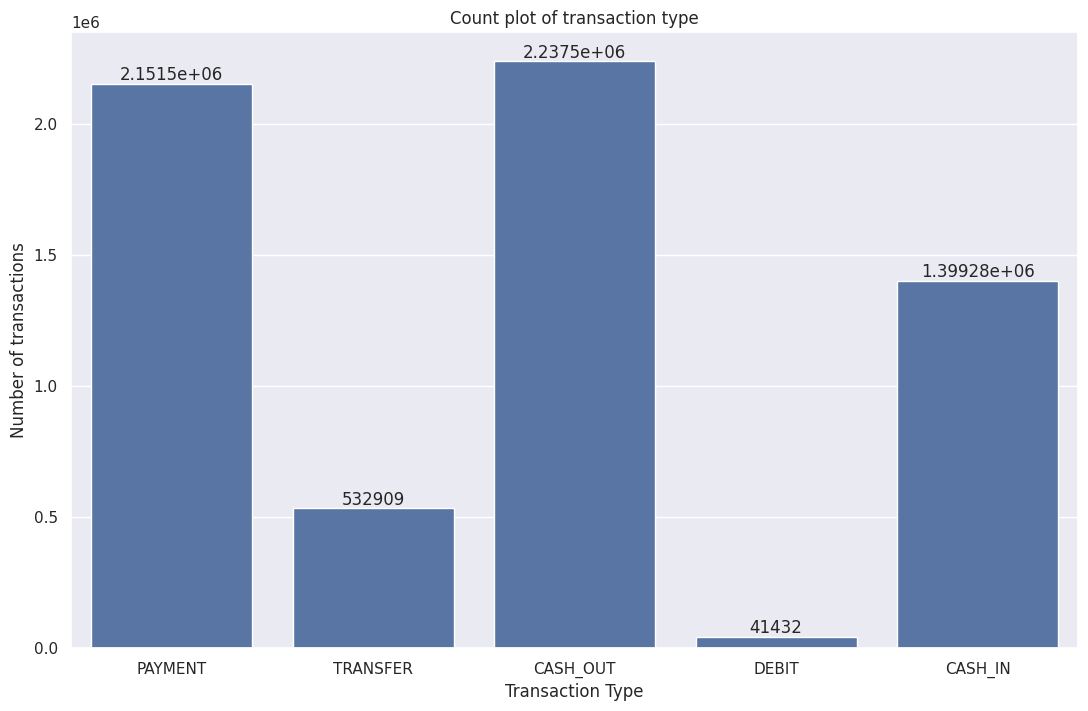

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(13, 8))
ax=sns.countplot(x='type', data=df_fraud)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.xlabel('Transaction Type')
plt.ylabel('Number of transactions')
plt.show()

##### 1. Why did you pick the specific chart?

*A count plot is used in data visualization to display the frequency of occurrence of each category in a categorical variable. It is a type of bar plot where the height of each bar represents the number of observations in each category.*

##### 2. What is/are the insight(s) found from the chart?

*Cash out is the most numerous transaction type, followed by payment, cash in, transfer and debit types.*

#### Chart - 2

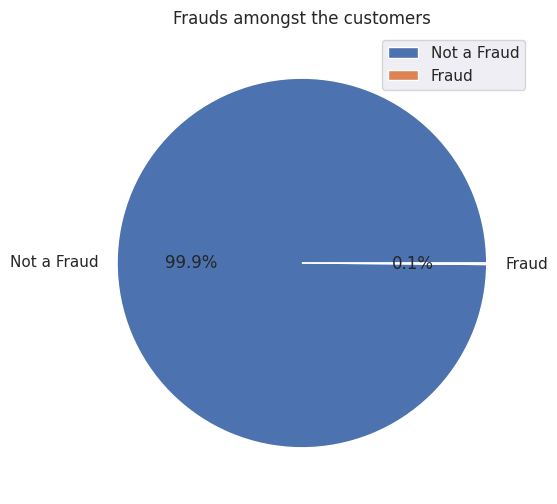

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(13,6))
df_fraud['isFraud'].value_counts().plot(kind='pie', autopct="%1.1f%%", labels=['Not a Fraud', 'Fraud'])
plt.axis('off')
plt.title('Frauds amongst the customers')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

*Pie chart is good to see proportions so here Fraud vs Non-Fraud is being shown*

##### 2. What is/are the insight(s) found from the chart?

*Fraud percentage is very few in this data yet we need to take care of this*

#### Chart - 3

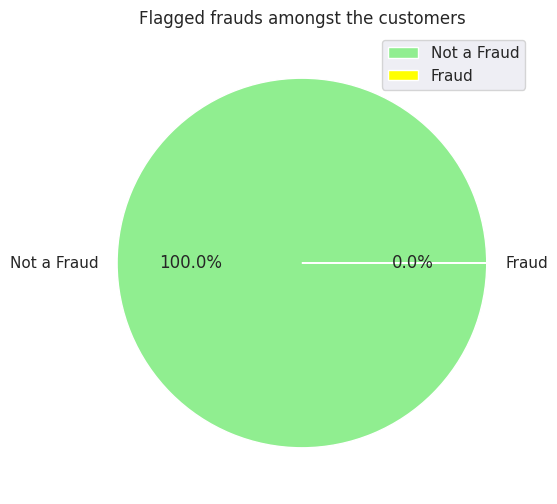

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(13,6))
df_fraud['isFlaggedFraud'].value_counts().plot(kind='pie', autopct="%1.1f%%", labels=['Not a Fraud', 'Fraud'], colors=['lightgreen', 'yellow'])
plt.axis('off')
plt.title('Flagged frauds amongst the customers')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

*Pie chart are good for proportion mentioning here Flagged fraud vs Non-Flagges Fraud is being plotted*

##### 2. What is/are the insight(s) found from the chart?

*Flagged fraud percentage is very less here which means potentially fraudulent transactions, which can then be flagged for further investigation and manual review are less in count*

**BIVARIATE ANALYSIS**

#### Chart - 4

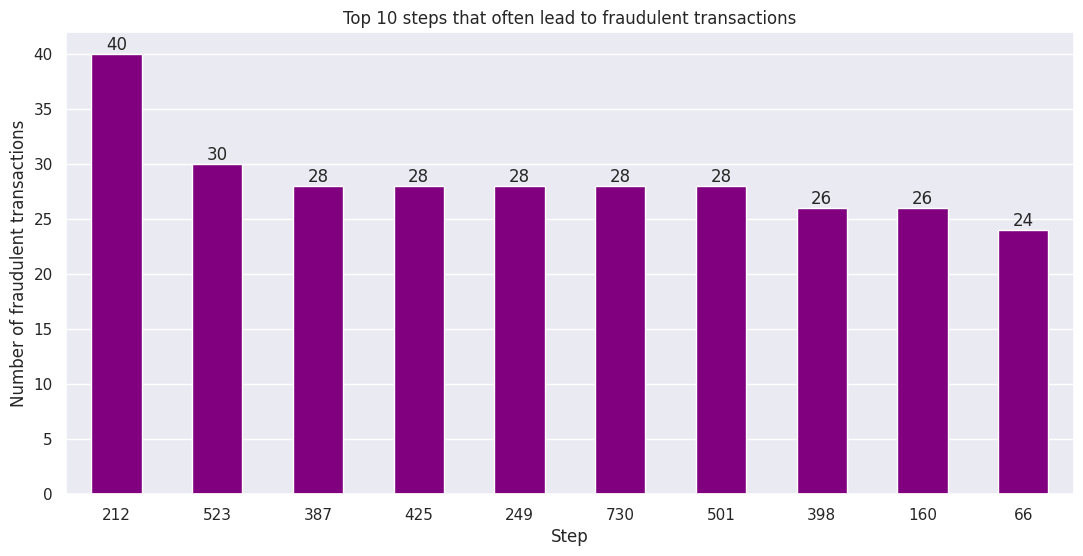

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(13, 6))
df_fraudulent=df_fraud[df_fraud['isFraud']==1]
top_steps=df_fraudulent['step'].value_counts().head(10)
ax=top_steps.plot(kind='bar', color='purple')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.xticks(rotation=0)
plt.grid(axis='x')
plt.show()

del ax, top_steps

##### 1. Why did you pick the specific chart?

*Count plots, also known simply as bar plots or bar charts, are used primarily to visualize the frequency or count of categorical data but not restricted so numerical data can also be seen.*

##### 2. What is/are the insight(s) found from the chart?

*Step 212 has the highest number of fraudulent transactions, 40 cases. This indicates that Step 212 is the step that will most likely lead to fraudulent transactions.*

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
df_frauds=df_fraud.copy()

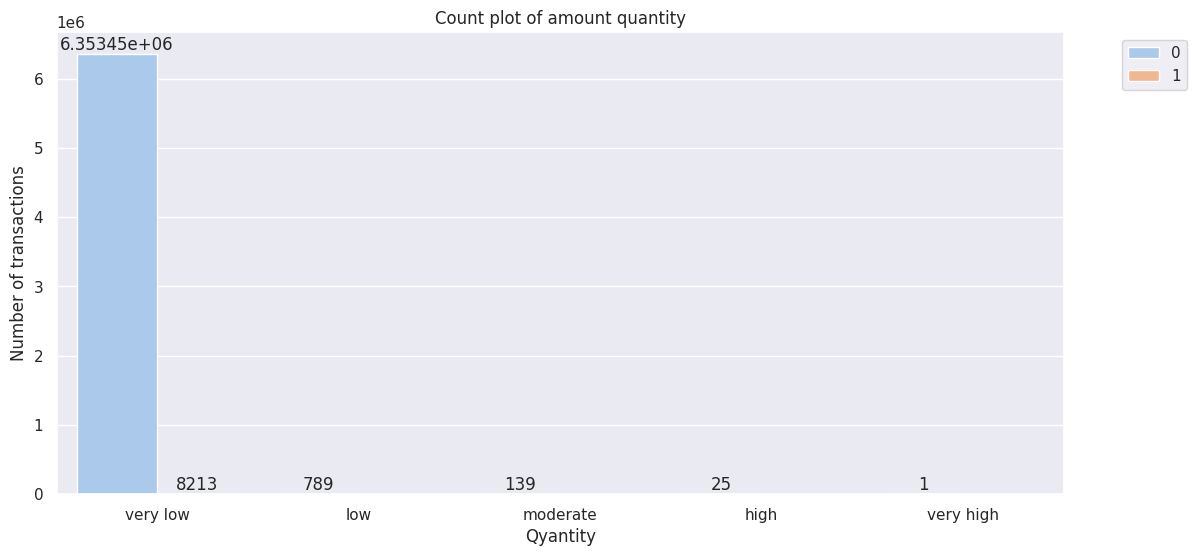

In [ ]:
# Create bins and labels for 'amount' column
bins= pd.cut(df_frauds['amount'], bins=5, labels=['very low', 'low', 'moderate', 'high', 'very high'])
df_frauds['quantity']=bins
plt.figure(figsize=(13, 6))
ax=sns.countplot(x='quantity', data=df_frauds, hue='isFraud', palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.ylabel('Number of transactions')
plt.xlabel('Qyantity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### 1. Why did you pick the specific chart?

*Simply as bar plots or bar charts, are used primarily to visualize the frequency or count of Numerical data.*

##### 2. What is/are the insight(s) found from the chart?

*All fraudulent transactions fall into the category of very low amounts. This suggests that in most cases, small transactions are more prone to fraudulent transactions.*

#### Chart - 6

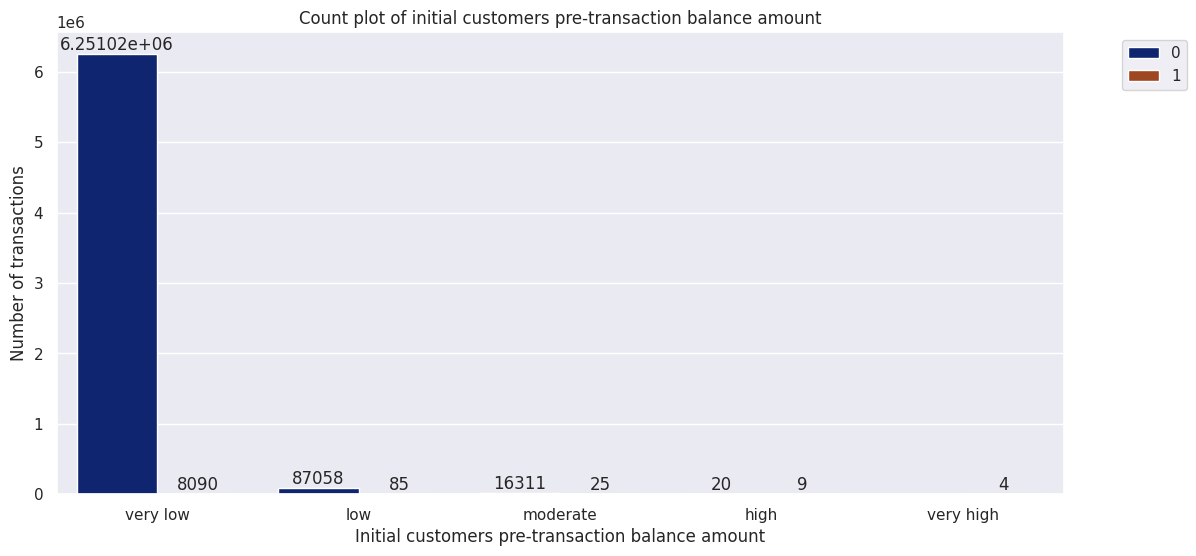

In [ ]:
# Chart - 6 visualization code
bins=pd.cut(df_fraud['oldbalanceOrg'], bins=5, labels=['very low', 'low', 'moderate', 'high', 'very high'])
df_frauds['oldbalanceOrg_amt']=bins
plt.figure(figsize=(13, 6))
ax=sns.countplot(x='oldbalanceOrg_amt', data=df_frauds, hue='isFraud', palette='dark')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

##### 1. Why did you pick the specific chart?

*Simply as bar plots or bar charts, are used primarily to visualize the frequency or count of Numerical data.*

##### 2. What is/are the insight(s) found from the chart?

*Initial customers with very low pre-transaction balances has the highest number of fraudulent transactions. This means that initial customers with very low pre-transaction balances may be more likely to fall for a fraudulent transaction.*

#### Chart - 7

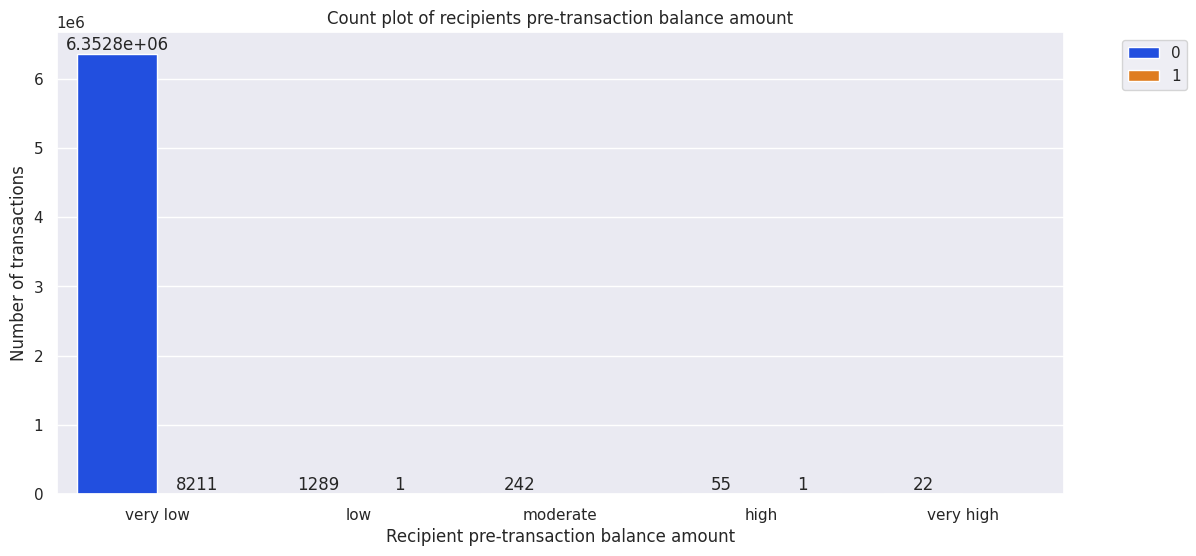

In [ ]:
# Chart - 7 visualization code
bins=pd.cut(df_fraud['oldbalanceDest'], bins=5, labels=['very low', 'low', 'moderate', 'high', 'very high'])
df_frauds['oldbalanceDest_amt']=bins
plt.figure(figsize=(13, 6))
ax=sns.countplot(x='oldbalanceDest_amt', data=df_frauds, hue='isFraud', palette='bright')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

##### 1. Why did you pick the specific chart?

*Simply as bar plots or bar charts, are used primarily to visualize the frequency or count of Numerical data.*

##### 2. What is/are the insight(s) found from the chart?

*Recipients with very low pre-transaction balances has the highest number of fraudulent transactions. This implies that recipients with very low pre-transaction balances may be more susceptible to fraudulent transactions.*

#### Chart - 8

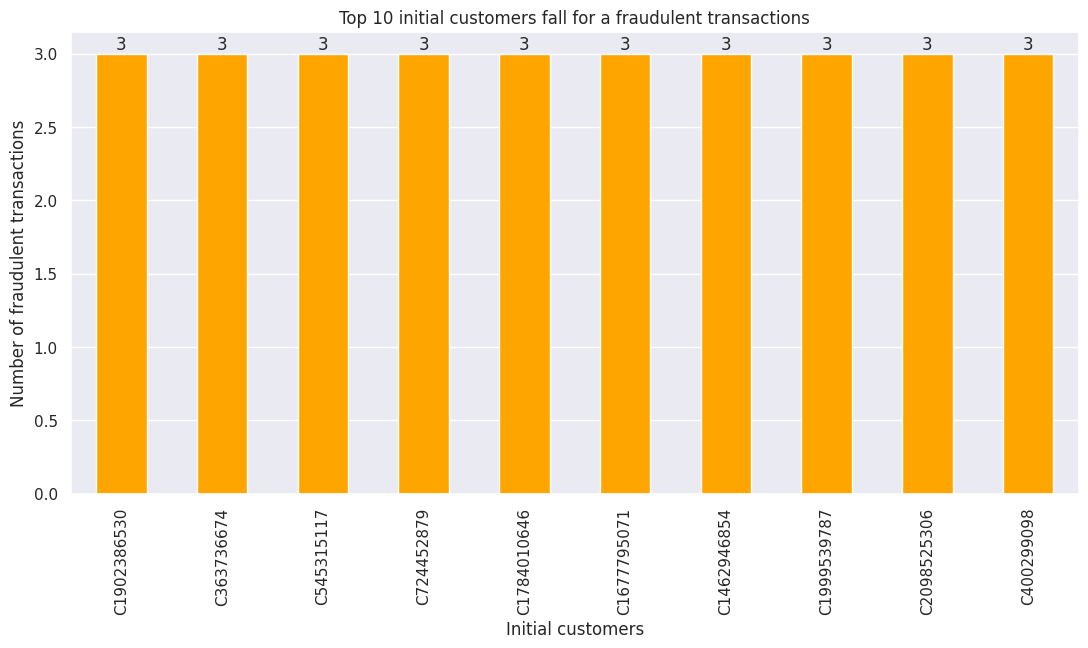

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(13, 6))
count_initial_customers=df_fraud['nameOrig'].value_counts().head(10)
ax=count_initial_customers.plot(kind='bar', color='orange')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')
plt.grid(axis='x')
plt.show()

del ax, count_initial_customers

##### 1. Why did you pick the specific chart?

*Simply as bar plots or bar charts, are used primarily to visualize the frequency or count of Numerical data.*

##### 2. What is/are the insight(s) found from the chart?

*Initial customers are scammed of at most one for a fraudulent transaction.*


#### Chart - 9

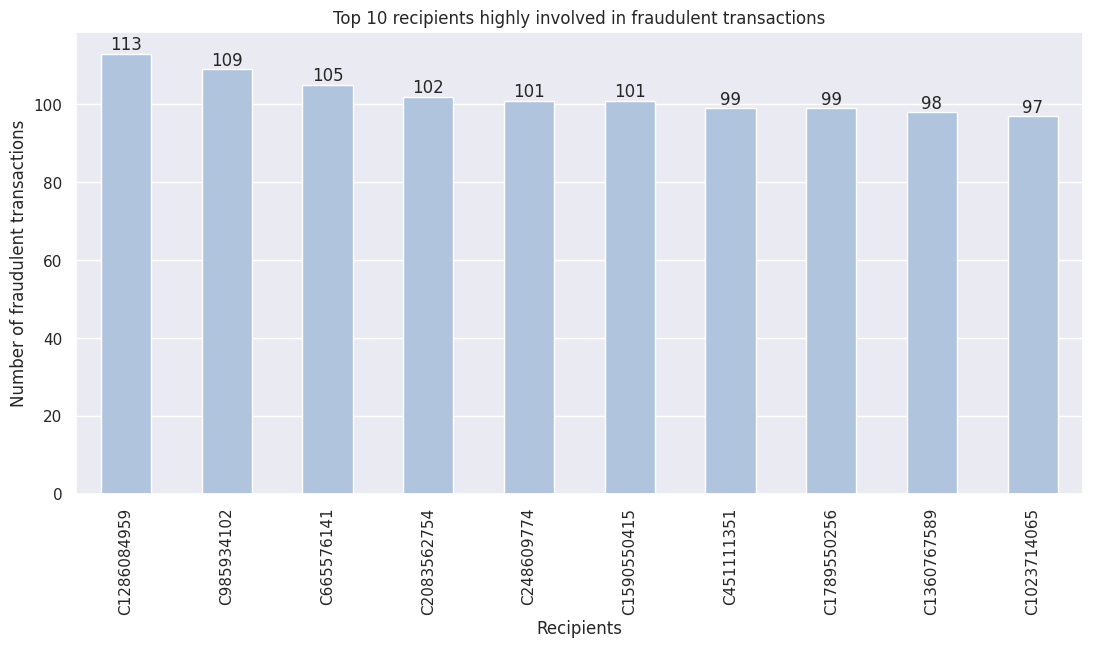

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(13, 6))
df2=df_fraud['nameDest'].value_counts().head(10)
ax=df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')
plt.grid(axis='x')
plt.show()

del ax, df2

##### 1. Why did you pick the specific chart?

*Simply as bar plots or bar charts, are used primarily to visualize the frequency or count of Numerical data.*

##### 2. What is/are the insight(s) found from the chart?

*Suspicious recipients only have a maximum of 2 involved fraudulent transactions.*

**MULTIVARIATE ANALYSIS**

#### Chart - 14 - Correlation Heatmap

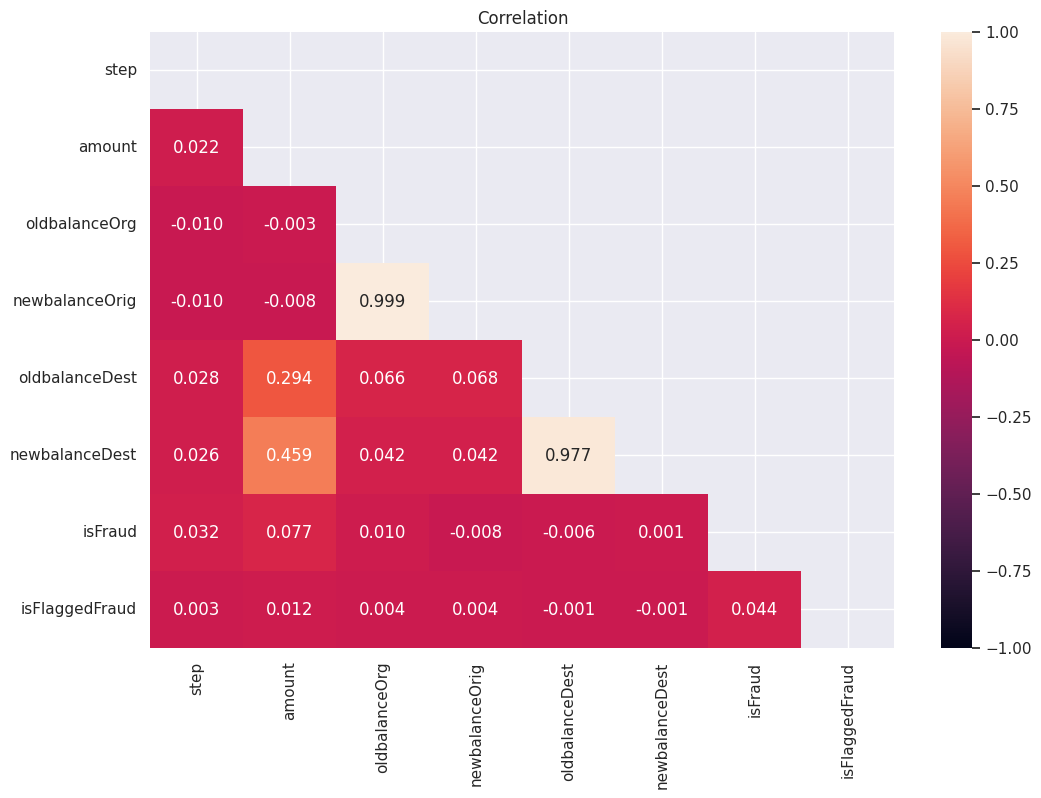

In [ ]:
# Correlation Heatmap visualization code
corr_matrix=df_fraud.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, mask = np.triu(np.ones_like(corr_matrix, dtype=bool)), fmt='.3f', vmin=-1, vmax=1)
plt.title('Correlation')
plt.show()

##### 1. Why did you pick the specific chart?

*Correlation heat maps are used to visualize the correlation matrix of variables in a dataset.*

##### 2. What is/are the insight(s) found from the chart?

*  *OldbalanceOrg and newbalanceOrig has strong positive relationship.*
*  *OldbalanceDest and newbalanceDest has strong positive relationship.*
*  *OldbalanceOrg and amount has weak positive relationship.*
*  *NewbalanceOrig and amount has moderate positive relationship.*

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df_fraud, hue='isFraud')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df_fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

No null values are there

### 2. Handling Outliers

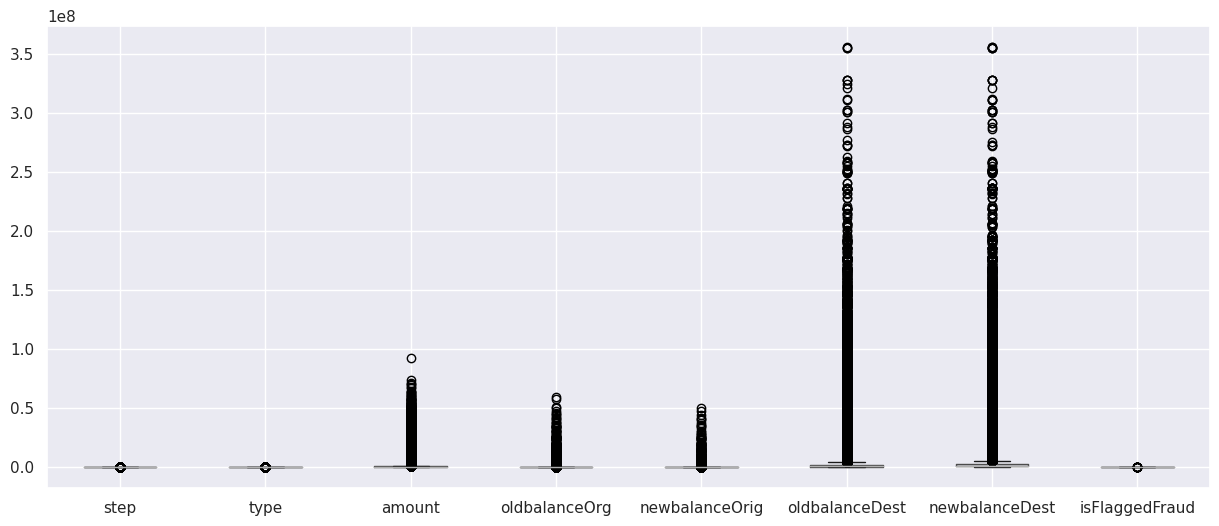

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(15,6))
numerical_col=['step',	'type',	'amount',	'oldbalanceOrg',	'newbalanceOrig',	'oldbalanceDest',	'newbalanceDest',	'isFlaggedFraud']
X.boxplot(numerical_col)
plt.show()

In [ ]:
# Outer Fence
def outlier_treatment_skew(df,feature):
  IQR=X[feature].quantile(0.75)-X[feature].quantile(0.25)
  lower_bridge=X[feature].quantile(0.25)-1.5*IQR
  upper_bridge=X[feature].quantile(0.75)+1.5*IQR
  return upper_bridge,lower_bridge

In [ ]:
# Restricting the data to lower and upper boundry
for feature in numerical_col:
  X.loc[X[feature]<=outlier_treatment_skew(df=X,feature=feature)[1], feature]=outlier_treatment_skew(df=X,feature=feature)[1]
  X.loc[X[feature]>=outlier_treatment_skew(df=X,feature=feature)[0], feature]=outlier_treatment_skew(df=X,feature=feature)[0]

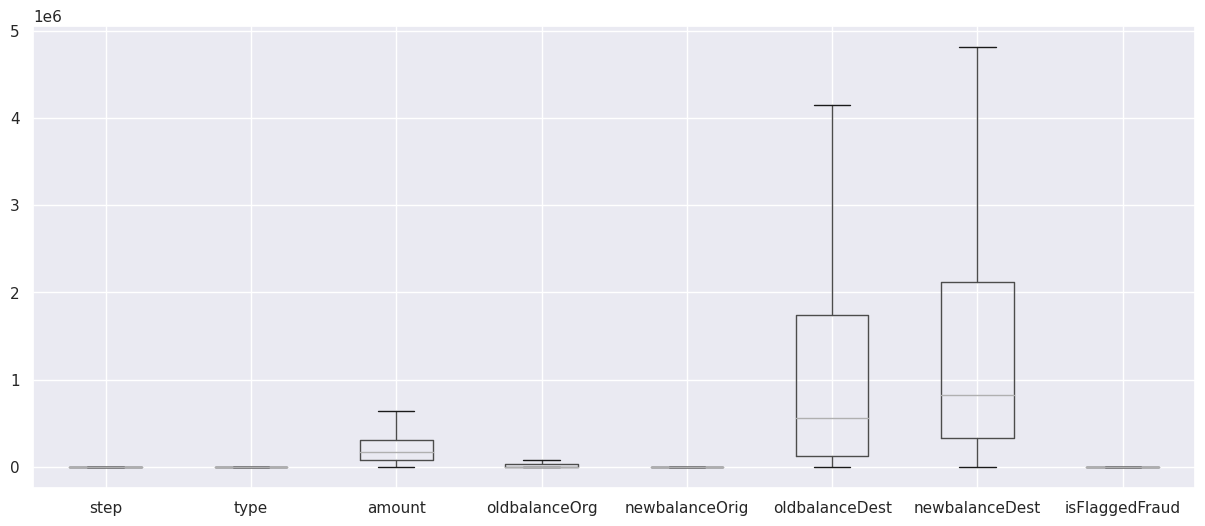

In [ ]:
# After outlier treatment
plt.figure(figsize=(15,6))
numerical_col=['step',	'type',	'amount',	'oldbalanceOrg',	'newbalanceOrig',	'oldbalanceDest',	'newbalanceDest',	'isFlaggedFraud']
X.boxplot(numerical_col)
plt.show()

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Label encoding for the transaction type
X['type'].replace('TRANSFER', 0, inplace=True)
X['type'].replace('CASH_OUT', 1, inplace=True)

<ipython-input-100-8bcbf69f9c39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['type'].replace('TRANSFER', 0, inplace=True)
<ipython-input-100-8bcbf69f9c39>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['type'].replace('CASH_OUT', 1, inplace=True)


#### What all categorical encoding techniques have you used & why did you use those techniques?

*Label encoding. It is a method used in machine learning to convert categorical data into numerical data, which can be easily processed by machine learning algorithms.*

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Removing unwanted columns
X=df_fraud.drop(['nameDest','nameOrig'], axis=1, inplace=True)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
X['errorBalanceOrig']=X.newbalanceOrig+X.amount-X.oldbalanceOrg
X['errorBalanceDest']=X.oldbalanceDest+X.amount-X.newbalanceDest

<ipython-input-102-8948bfa8cfff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceOrig']=X.newbalanceOrig+X.amount-X.oldbalanceOrg
<ipython-input-102-8948bfa8cfff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceDest']=X.oldbalanceDest+X.amount-X.newbalanceDest


In [ ]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00,1,0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,1,0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0,0,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0,0,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,300850.89,-2401220.0


### 5. Data Splitting

In [ ]:
# Making our independent set
Y=X['isFraud']
# Removing the dependent set
X=X.drop(['isFraud'], axis = 1)
# Getting the shapes of x and y
print('Shape of x: ', X.shape)
print('Shape of y: ', Y.shape)

In [ ]:
# OVER-SAMPLING
x_resample, y_resample = SMOTE().fit_resample(X, Y.ravel())
# getting the shapes of x and y after resampling
print("Shape of x: ", x_resample.shape)
print("Shape of y:", y_resample.shape)

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test=train_test_split(x_resample, y_resample, test_size=0.2, random_state=0)
# Checking the new shapes
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (4419513, 10)
Shape of x_test:  (1104879, 10)
Shape of y_train:  (4419513,)
Shape of y_test:  (1104879,)


In [ ]:
# Performing standard scaling on the data for better fit
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## ***7. ML Model Implementation***

### ML Model - 1

**Xg-Boost Model**

In [ ]:
# ML Model - 1 Implementation
model=XGBClassifier()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
# score of the model
auprc=average_precision_score(y_test, y_pred)
print("The Area under Precision Recall Curve Score is", auprc)

The Area under Precision Recall Curve Score is 0.9985114332833311


In [ ]:
# Visualizing evaluation Metric Score chart
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[552407    713]
 [   300 551459]]


Text(0.5, 0, 'False Positive Rate')

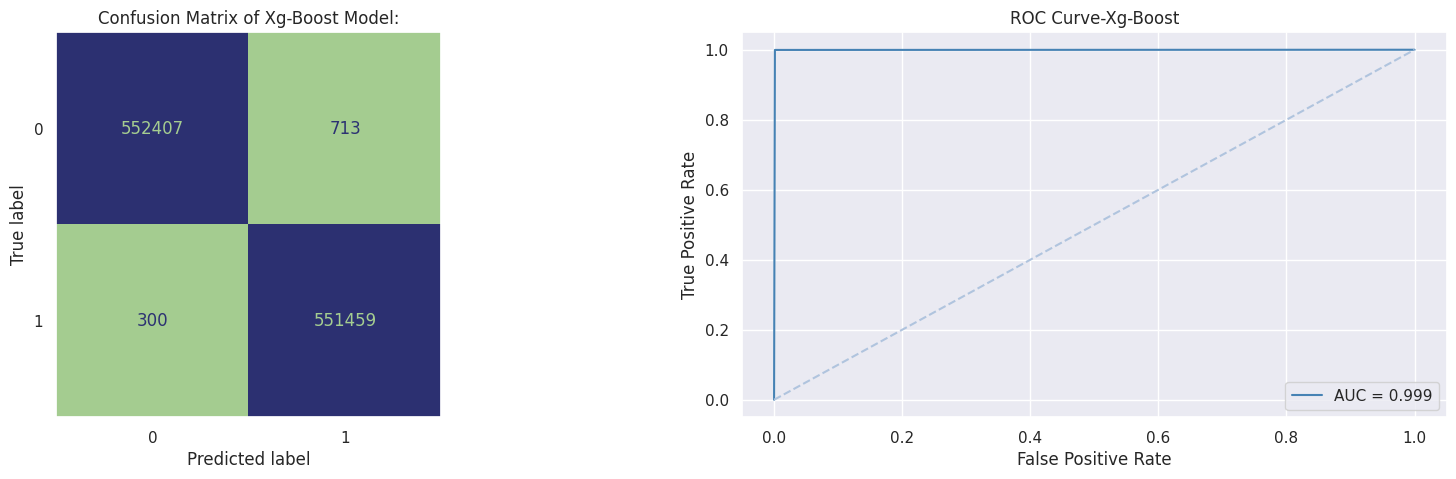

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of Xg-Boost Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc=auc(fpr, tpr)
ax[1].set_title('ROC Curve-Xg-Boost')
ax[1].plot(fpr, tpr, label='AUC = %0.3f' % roc_auc, c='steelblue')
ax[1].plot([0,1],[0,1],'--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

# **Conclusion**

*The Xg-Boost model has emerged as the top performer in the task of identifying fraudulent and non-fraudulent payments. Among all the models tested, Xg-Boost achieved the highest score, highlighting its superior performance in this domain. One of the key metrics used to evaluate the effectiveness of a classification model is the Area Under the Curve (AUC) of the Receiver Operating Characteristic (ROC) curve. For the Xg-Boost model, the AUC score is an impressive 0.998. This score is very close to 1, indicating an excellent ability to distinguish between the positive and negative classes—in this case, fraudulent and non-fraudulent payments.*

*An AUC of 0.998 suggests that the Xg-Boost model has a 99.8% probability of correctly differentiating between a fraudulent and a non-fraudulent transaction. This high level of accuracy is crucial in practical applications, where the cost of incorrectly classifying a fraudulent payment as legitimate (or vice versa) can be substantial. The model’s near-perfect separability measure means it is highly reliable and efficient in identifying payment fraud, which is a critical aspect of maintaining the integrity of financial systems. Overall, the Xg-Boost model’s outstanding performance underscores its utility and robustness in the detection of fraudulent activities in payment systems.*

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

**Created by:** Vishal Sinha Roy

**Email:** vishalsingha.r05@gmail.com